<a href="https://colab.research.google.com/github/vishnu-096/Pareto_optimization/blob/main/pareto_mine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

value [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000]
f1 [0.417 0.274 0.148 0.008 0.392 0.025 0.312 0.616 0.123 0.768 0.016 0.001
 0.339 0.710 0.141 0.250 0.740 0.003 0.140 0.405 0.460 0.238 0.346 0.003
 0.184 0.175 0.752 0.316 0.785 0.013 0.001 0.027 0.722 0.195 0.107 0.318
 0.295 0.590 0.004 0.081 0.021 0.576 0.172 0.268 0.278 0.269 0.533 0.055
 0.112 0.052 0.078 0.011 0.052 0.615 0.096 0.121 0.389 0.029 0.010 0.576
 0.160 0.572 0.4

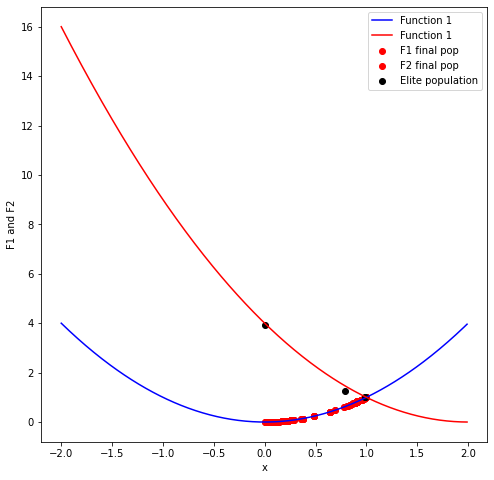

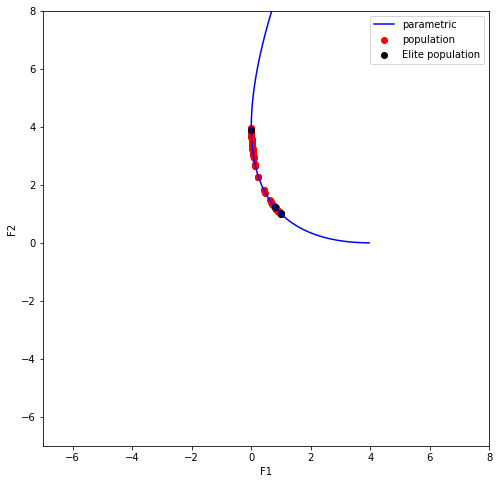

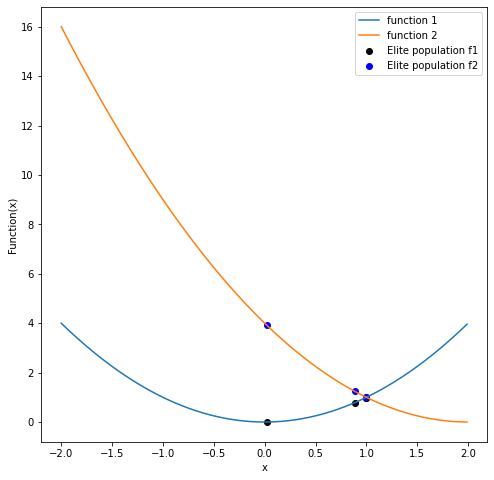

In [ ]:
from re import M
from numpy.ma.extras import average
import numpy as np
import matplotlib.pyplot as plt
import random

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

#objective function 1
def func_1(x):
  # f=x*np.sin(10*np.pi*x)
  f=(x**2)
  return f

#objective function 2
def func_2(x):
  # f=2.5*x*np.cos(3*np.pi*x)
  f= ((x-2)**2)
  # print(f)
  return f


def func_3(x):
  return np.piecewise(x, [x <= 1, ((x>1) & (x<=3)), ((x>3) & (x<=4)), x>4], [lambda x: -x, lambda x: x-2,lambda x:4-x ,lambda x: x-4])

def func_4(x):
  return np.square(x-5)

#crossover for GA
def crossover(parents):
  ch=np.empty(len(parents[0]))
  # print("parents", parents)
  # print("Parents: ", parents)

  for i in range(0, len(parents[0])):
    r=np.random.random_sample()
    if r<0.5:
      # print("p1",parents[0,i])
      ch[i]=parents[0,i]
    else:
      # print("p2",parents[0,i])
      ch[i]=parents[1,i]
  # print("child", ch)    
  return ch

#Function to convert the vector form of GA to a decimal value
def convert_to_dec(x):
  i=0
  dec=float("{0:.4f}".format(x[i]))
  for i in range(1,len(x)-1):
    f=float("{0:.4f}".format(0.1**i))
    dec= float("{0:.4f}".format(dec + x[i]* f))
    # print(round(dec)," ",f," ", float("{0:.4f}".format((0.1)**i)))
  dec=dec/10
  return dec

#function to convert decimal value to a vector form
def convert_to_vec(dec,n, sigma):
  x=[]
  # print(dec)
  for i in range(n-1):
    x.append(int(dec%10))
    dec=dec*10
  x.append(sigma)
  return x

#mutation of GA
def mutation(x):
  n_var=len(x)
  sigma_ch=x[len(x)-1]
  tau = 1 / (np.sqrt(2 * np.sqrt(n_var)))
  tau_prime = 1 / (np.sqrt(2 * n_var))
  dist = np.random.normal(0, 1)
  sigma_ch = sigma_ch*np.exp(tau*dist+tau_prime*dist)
  # ch_val = np.copy(x)+sigma_ch*dist;
  ch_val=convert_to_dec(x)
  if np.random.rand()<0.5:
    ch_val= ch_val + 2*np.random.rand()
  else: 
    ch_val= ch_val - 2*np.random.rand()

  child= convert_to_vec(ch_val, n_var, sigma_ch)

  return child

#Pareto dominance implementation where individuals within niche radius are also penalised
def pareto_dominance_with_niche_penalty(x, tourn_x, f1, f2):
    count=0
    niche_r=0.5
    score=0
    new_elite=[]
    elite_sh=[]
    dom_flag=False

    x_value = np.empty((len(x)))
    print("value",x_value)
    for i in range(len(x)):
      x_value[i]=(convert_to_dec(x[i,:]))
    f_1 = f1(x_value)
    f_2 = f2(x_value)

    tourn_f1 = f1(x_value)
    tourn_f2 = f2(x_value)
    score_x = list(range(10,10+len(x)))
    temp_x=x
    ind=list(range(len(x)))
    print("f1", f_1)
    print("f2", f_2)

    for i in range(len(x)):
      neigh_count=0
      score=0
      dom_Flag1=False
      dom_Flag2=False
      for j in range(len(x)):
        if i!=j:
          if f_1[i] >= tourn_f1[j] and f_2[i] >= tourn_f2[j]:  # atleast equal in all objectives
              score += 4
              if f_1[i] > tourn_f1[j] or f_2[i] > tourn_f2[j]:  # strong dominance
                  score += 2

          elif f_1[i] > tourn_f1[j] or f_2[i] > tourn_f2[j]:  # weak domination
              score += 1
          if f_1[i]< tourn_f1[j]:
            dom_Flag1=True
          if f_2[i]< tourn_f2[j]:
            dom_Flag2= True

    #if the distance between the current indivual and others near are less than niche radius , we penalise them
          if (np.linalg.norm(x[i]-x[j]))< niche_r:
              neigh_count+=1

      if neigh_count>1:
        score=score/neigh_count # penalising the individual based on how many are there inside the niche radius
      # print("i",i,"score",score)

      if not(dom_Flag1 & dom_Flag2): #if individual is not dominated in both, its added to seperate list
        print(" non dominated")
        new_elite.append(x_value[i])
        elite_sh.append(score)

#dynamically ranking and sorting the scores/value of fitness
      if i==0:
        score_x[i]=score
        ind[i]=i
        count=count+1
        # print("a")
        continue
      for k in range(i+1):
        if k==count:
          # print("b")
          score_x[k]=score
          ind[k]=i
          count=count+1
          break
        if score<=score_x[k]:
          # print("c")
          continue
        else:
          # print("d")
          for l in range(count,k,-1):
            score_x[l]=score_x[l-1]
            ind[l]=ind[l-1]
          score_x[k]=score
          ind[k]=i
          count=count+1
          break
      # print(score_x)  
    # new_elite=np.array(new_elite)
    # elite_sh=np.array(elite_sh)
    return score_x, ind, new_elite, elite_sh

#Start with a population, do GA and pareto ranking
def main_process(f1,f2):
  #size of population
  pop_size=100
  pc=0.8
  pm=0.5


  #First element is ones digit followed by decimal places
  #limit between l1 to l2
  l1=0
  l2=1
  n=6 #  last element is the adaptive variance wrt this individual
  R=int(pop_size*0.6)
  M=int(pop_size*0.5)
  
  num_of_iter=30
  pop_gen=np.empty((pop_size, n))
  new_pop=np.empty((pop_size,n))
  ranked_pop=np.empty((pop_size,n))
  # elite=np.empty(M)
  elite=[]
  elite_sh=[]

  shape = (1, n-1)
  for i in range(0, pop_size):
    pop_sigma = np.random.uniform(-0.5,0.5 )
    pop_gen[i, :] = np.array(random.choices(range(0,9),k=n))
    pop_gen[i, n-1]=pop_sigma



  # print("pop",pop_gen)
  while num_of_iter>0:
    # print("iteration",30-num_of_iter)
    temp_pop=pop_gen[:,0:n-1]
    score_pop, ind_pop, tmp_elite, tmp_sh=pareto_dominance_with_niche_penalty(temp_pop, temp_pop, f1,f2)
    # pop_gen_ranked=sort_A_bsdon_B(pop_gen, score_pop)
    # print("index",ind_pop)
    for i in range(0, pop_size):
      ranked_pop[i] = pop_gen[ind_pop[i]]

    #select R parents
    parent_pop=ranked_pop[0:R,:]
    # print("parents ", parent_pop)
    new_pop[0:R,:]=ranked_pop[0:R, :]
    cn=0
    # print("new_pop", new_pop)
    # print("parents",parent_pop)
    while cn<(pop_size-R):

      inds =  np.random.choice(list(range(R)), 2) #choosing parents
      # print("parent indexes ",inds)
      parents=np.empty((2,n))
      parents[0]=pop_gen[inds[0],:]
      parents[1]=pop_gen[inds[1],:]
      # parents=np.array( [ pop_gen[inds[0],:]],[pop_gen[inds[1],:] ] ])  
      # # now we need pop_size- R offsprings
      if np.random.sample()<pc: 
        # print("2 parents",parents)
        child=crossover(parents)

      else:
        child=parents[0,:]
      if np.random.sample()<pm:
        # print("child",child)
        child=mutation(child)

      new_pop[R+cn,:]= child
      cn=cn+1

    tmp_elite = [x for _,x in sorted(zip(tmp_sh, tmp_elite),reverse=True)] #sort elite based on elite scores

# Always add to elite if there is space left or this can replace an existing elite individual
    if elite:
      
      if len(elite)<M:
        space=len(elite)-M
        for i in range(len(elite),min(M,len(tmp_elite))):
          elite.append(tmp_elite[i])
          elite_sh.append(tmp_sh[i])
      else:    
        for i in range(len(tmp_elite)):
          for j in range(len(elite)):
            if tmp_sh[i]> elite_sh[j]:
              elite[j]=tmp_elite[i]
              elite_sh[j]=tmp_sh[i]
        # (np.linalg.norm(elite[i]-x[j]))>0.2
    else:
      elite=tmp_elite
      elite_sh=tmp_sh
      print("hello", tmp_elite)
    print("Iteration ",num_of_iter)#," population:",pop_gen)
    pop_gen=new_pop
    num_of_iter=num_of_iter-1

  return pop_gen, elite



def main_process_modified():
  #size of population
  pop_size=100
  pc=0.8
  pm=0.5


  #First element is ones digit followed by decimal places
  #limit between l1 to l2
  l1=0
  l2=1
  n=6 #  last element is the adaptive variance wrt this individual
  R=int(pop_size*0.6)
  M=int(pop_size*0.5)
  
  num_of_iter=30
  pop_gen=np.empty((pop_size, n))
  new_pop=np.empty((pop_size,n))
  ranked_pop=np.empty((pop_size,n))
  # elite=np.empty(M)
  elite=[]
  elite_sh=[]

  shape = (1, n-1)
  for i in range(0, pop_size):
    pop_sigma = np.random.uniform(-0.5,0.5 )
    pop_gen[i, :] = np.array(random.choices(range(0,9),k=n))
    pop_gen[i, n-1]=pop_sigma



  # print("pop",pop_gen)
  while num_of_iter>0:
    # print("iteration",30-num_of_iter)
    temp_pop=pop_gen[:,0:n-1]
    score_pop, ind_pop, tmp_elite, tmp_sh=pareto_dominance_with_niche_penalty(temp_pop, temp_pop)
    # pop_gen_ranked=sort_A_bsdon_B(pop_gen, score_pop)
    # print("index",ind_pop)
    for i in range(0, pop_size):
      ranked_pop[i] = pop_gen[ind_pop[i]]

    #select R parents
    parent_pop=ranked_pop[0:R,:]
    # print("parents ", parent_pop)
    new_pop[0:R,:]=ranked_pop[0:R, :]
    cn=0
    # print("new_pop", new_pop)
    # print("parents",parent_pop)
    while cn<(pop_size-R):

      inds =  np.random.choice(list(range(R)), 2)
      # print("parent indexes ",inds)
      parents=np.empty((2,n))
      parents[0]=pop_gen[inds[0],:]
      parents[1]=pop_gen[inds[1],:]
      # parents=np.array( [ pop_gen[inds[0],:]],[pop_gen[inds[1],:] ] ])  
      # # now we need pop_size- R offsprings
      if np.random.sample()<pc: 
        # print("2 parents",parents)
        child=crossover(parents)

      else:
        child=parents[0,:]
      if np.random.sample()<pm:
        # print("child",child)
        child=mutation(child)

      new_pop[R+cn,:]= child
      cn=cn+1

    tmp_elite = [x for _,x in sorted(zip(tmp_sh, tmp_elite),reverse=True)]

    if elite:
      
      if len(elite)<M:
        space=len(elite)-M
        for i in range(len(elite),min(M,len(tmp_elite))):
          elite.append(tmp_elite[i])
          elite_sh.append(tmp_sh[i])

      else:    
        for i in range(len(tmp_elite)):
          div_flag=False
          for j in range(len(elite)):
            if not div_flag:
              if tmp_sh[i]> elite_sh[j]:
                pos= j
                div_flag=True
                elite[j]=tmp_elite[i]
                elite_sh[j]=tmp_sh[i]
            
            
        # (np.linalg.norm(elite[i]-x[j]))>0.2
    else:
      elite=tmp_elite
      elite_sh=tmp_sh
      # print("hello", tmp_elite)
    # print("Iteration ",num_of_iter)#," population:",pop_gen)
    pop_gen=new_pop
    num_of_iter=num_of_iter-1

  return pop_gen, elite


n=100
final_pop=[]
lim1=-2
lim2=2
x = np.arange(lim1, lim2, 1/n).reshape((lim2-lim1)*n, 1)
pop,elite=main_process(func_1, func_2)
# print("population",pop)
for i in range(len(pop)):
  dec=convert_to_dec(pop[i,:])
  final_pop.append(dec)
final_pop=np.array(final_pop)

plt.figure(figsize=(8, 8))
plt.plot(x, func_1(x), c="blue",label="Function 1")
plt.xlabel("x")
plt.ylabel("F1 and F2")
plt.plot(x, func_2(x), c="red",label="Function 1")
plt.scatter(final_pop,func_1(final_pop),  c="red", label="F1 final pop")
plt.scatter(final_pop,func_1(final_pop),  c="red", label="F2 final pop")
plt.scatter(func_1(np.array(elite)), func_2(np.array(elite)), c="black", label="Elite population")
plt.legend()

plt.figure(figsize=(8, 8))
plt.plot(func_1(x), func_2(x), c="blue",label="parametric")
plt.xlabel("F1")
plt.ylabel("F2")
plt.xlim(-7,8)
plt.ylim(-7, 8)
# pop,elite=main_process()
# # print("population",pop)
# for i in range(len(pop)):
#   dec=convert_to_dec(pop[i,:])
#   final_pop.append(dec)
# final_pop=np.array(final_pop)
print(final_pop)
plt.scatter(func_1(final_pop), func_2(final_pop), c="red", label="population")
print("elite ", elite)
plt.scatter(func_1(np.array(elite)), func_2(np.array(elite)), c="black", label="Elite population")

plt.legend()
plt.figure(figsize=(8, 8))
plt.plot(x,func_1(x),label="function 1")
plt.plot(x,func_2(x),label="function 2")
plt.scatter(elite, func_1(np.array(elite)), c="black", label="Elite population f1")
plt.scatter(elite, func_2(np.array(elite)), c="blue", label="Elite population f2")
plt.xlabel("x")
plt.ylabel("Function(x)")
plt.legend()


value [3.010 3.020 3.030 3.040 3.050 3.060 3.070 3.080 3.090 3.100 3.110 3.120
 3.130 3.140 3.150 3.160 3.170 3.180 3.190 3.200 3.210 3.220 3.230 3.240
 3.250 3.260 3.270 3.280 3.290 3.300 3.310 3.320 3.330 3.340 3.350 3.360
 3.370 3.380 3.390 3.400 3.410 3.420 3.430 3.440 3.450 3.460 3.470 3.480
 3.490 3.500 3.510 3.520 3.530 3.540 3.550 3.560 3.570 3.580 3.590 3.600
 3.610 3.620 3.630 3.640 3.650 3.660 3.670 3.680 3.690 3.700 3.710 3.720
 3.730 3.740 3.750 3.760 3.770 3.780 3.790 3.800 3.810 3.820 3.830 3.840
 3.850 3.860 3.870 3.880 3.890 3.900 3.910 3.920 3.930 3.940 3.950 3.960
 3.970 3.980 3.990 4.000]
f1 [-0.187 -0.668 -0.782 -0.224 -0.552 -0.382 -0.044 -0.554 -0.514 -0.358
 -0.314 -0.205 -0.459 -0.173 -0.608 -0.373 -0.208 -0.545 -0.633 -0.557
 -0.480 -0.778 -0.837 -0.422 -0.075 -0.340 -0.662 -0.862 -0.426 -0.705
 -0.354 -0.571 -0.579 -0.535 -0.821 -0.732 -0.846 -0.655 -0.546 -0.063
 -0.254 -0.711 -0.478 -0.321 -0.501 -0.605 -0.037 -0.083 -0.356 -0.452
 -0.376 -0.407 -0.688 -0.6

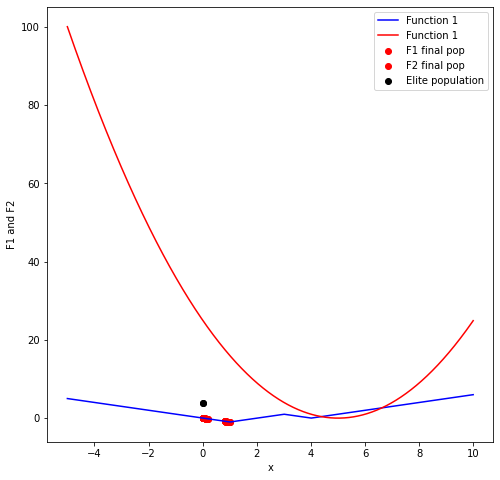

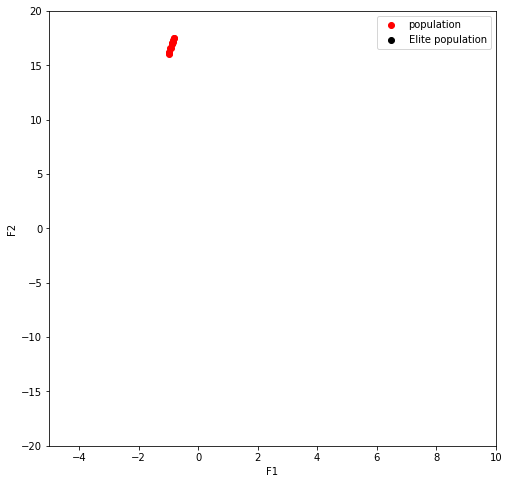

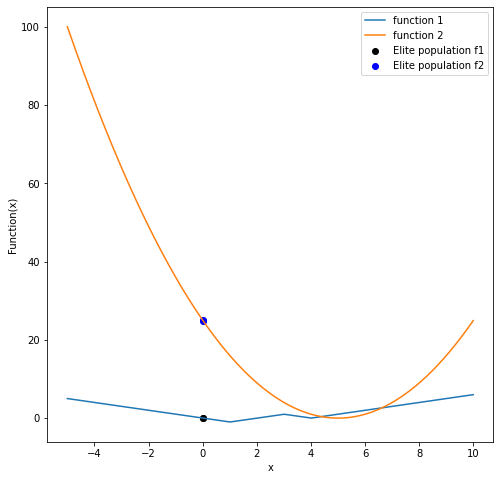

In [ ]:
n=100
final_pop=[]
lim1=-5
lim2=10
x = np.arange(lim1, lim2, 1/n).reshape((lim2-lim1)*n, 1)
pop,elite=main_process(func_3, func_4)
# print("population",pop)
for i in range(len(pop)):
  dec=convert_to_dec(pop[i,:])
  final_pop.append(dec)
final_pop=np.array(final_pop)

plt.figure(figsize=(8, 8))
plt.plot(x, func_3(x), c="blue",label="Function 1")
plt.xlabel("x")
plt.ylabel("F1 and F2")
plt.plot(x, func_4(x), c="red",label="Function 1")
plt.scatter(final_pop,func_3(final_pop),  c="red", label="F1 final pop")
plt.scatter(final_pop,func_3(final_pop),  c="red", label="F2 final pop")
plt.scatter(func_3(np.array(elite)), func_2(np.array(elite)), c="black", label="Elite population")
plt.legend()

plt.figure(figsize=(8, 8))
# plt.plot(func_3(x), func_4(x), c="blue",label="parametric")
plt.xlabel("F1")
plt.ylabel("F2")
plt.xlim(-5,10)
plt.ylim(-20, 20)
# pop,elite=main_process()
# # print("population",pop)
# for i in range(len(pop)):
#   dec=convert_to_dec(pop[i,:])
#   final_pop.append(dec)
# final_pop=np.array(final_pop)
print(final_pop)
plt.scatter(func_3(final_pop), func_4(final_pop), c="red", label="population")
print("elite ", elite)
plt.scatter(func_3(np.array(elite)), func_4(np.array(elite)), c="black", label="Elite population")

plt.legend()
plt.figure(figsize=(8, 8))
plt.plot(x,func_3(x),label="function 1")
plt.plot(x,func_4(x),label="function 2")
plt.scatter(elite, func_3(np.array(elite)), c="black", label="Elite population f1")
plt.scatter(elite, func_4(np.array(elite)), c="blue", label="Elite population f2")
plt.xlabel("x")
plt.ylabel("Function(x)")
plt.legend()